In [1]:
import numpy as np
import pandas as pd

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv("/Users/digvijaysonawane/Downloads/creditcard.csv")

# EDA

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,...,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

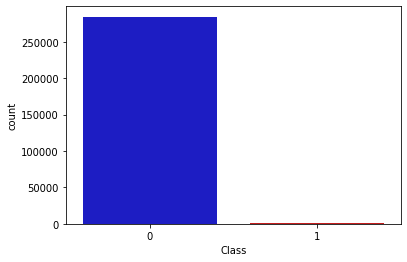

In [6]:
colors = ["#0101DF", "#DF0101"]

sns.countplot('Class', data=df, palette=colors)


# Scaling the amount and time variable 

In [7]:
from sklearn.preprocessing import StandardScaler, RobustScaler

# RobustScaler is less prone to outliers.

std_scaler = StandardScaler()
rob_scaler = RobustScaler()

df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

In [8]:
# Since our classes are highly skewed we should make them equivalent in order to have a normal distribution of the classes.

# Lets shuffle the data before creating the subsamples

df = df.sample(frac=1)

# amount of fraud classes 492 rows.
fraud_df = df.loc[df['Class'] == 1]
non_fraud_df = df.loc[df['Class'] == 0][:492]

normal_distributed_df = pd.concat([fraud_df, non_fraud_df])

# Shuffle dataframe rows
new_df = normal_distributed_df.sample(frac=1, random_state=42)

new_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_amount,scaled_time
145915,-1.753311,0.855278,-2.133943,-2.610017,0.267504,-0.178935,0.943363,-2.824284,0.113114,-1.171385,...,1.116850,0.092252,0.406804,-0.398606,0.444410,-0.135557,-0.276084,0,1.928317,0.030393
141257,-0.937843,3.462889,-6.445104,4.932199,-2.233983,-2.291561,-5.695594,1.338825,-4.322377,-8.099119,...,-0.521657,-0.319917,-0.405859,0.906802,1.165784,1.374495,0.729889,1,-0.307413,-0.005733
156661,-0.512527,0.882038,2.412908,-0.122242,0.220595,-0.232359,0.624517,-0.315399,1.344252,-1.185024,...,-0.321127,-0.290028,-0.087640,0.290520,-0.728752,-0.072504,-0.143292,0,-0.149934,0.281042
53794,-1.346509,2.132431,-1.854355,2.116998,-1.070378,-1.092671,-2.230986,1.036425,-1.895516,-3.364011,...,0.202874,-0.060791,-0.186733,-0.017401,-0.283751,0.395451,0.233139,1,-0.293440,-0.452813
11343,-14.179165,7.421370,-21.405836,11.927512,-7.974281,-2.202710,-15.471612,-0.356595,-6.380125,-13.348278,...,1.130955,0.991153,-1.033132,-0.327179,0.634693,2.171905,-1.395288,1,-0.293440,-0.762814


Distribution of the Classes in the subsample dataset
1    0.5
0    0.5
Name: Class, dtype: float64


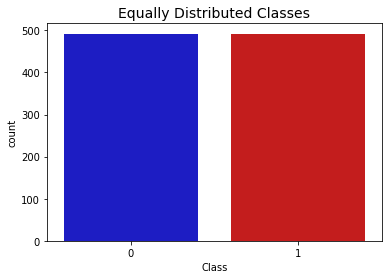

In [9]:
print('Distribution of the Classes in the subsample dataset')
print(new_df['Class'].value_counts()/len(new_df))



sns.countplot('Class', data=new_df, palette=colors)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

In [10]:
X = new_df.drop('Class', axis=1).to_numpy()
y = new_df['Class'].to_numpy()

In [11]:
from sklearn.model_selection import train_test_split

# This is explicitly used for undersampling.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
m_train = X_train.shape[0]
m_test = X_test.shape[0]
### END CODE HERE ###

print ("Number of training examples: m_train = " + str(m_train))
print ("Number of testing examples: m_test = " + str(m_test))
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

Number of training examples: m_train = 787
Number of testing examples: m_test = 197
train_set_x shape: (787, 30)
train_set_y shape: (787,)
test_set_x shape: (197, 30)
test_set_y shape: (197,)


In [13]:
y_train = y_train.reshape(y_train.shape[0],1).T
y_test = y_test.reshape(y_test.shape[0],1).T

X_train = X_train.reshape(X_train.shape[0], X_train.shape[1]).T
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1]).T


In [14]:
print ("train_set_x shape: " + str(X_train.shape))
print ("train_set_y shape: " + str(y_train.shape))
print ("test_set_x shape: " + str(X_test.shape))
print ("test_set_y shape: " + str(y_test.shape))

train_set_x shape: (30, 787)
train_set_y shape: (1, 787)
test_set_x shape: (30, 197)
test_set_y shape: (1, 197)


In [15]:
print(X_train[:20])
print(y_train[:20])
print(X_test[:20])
print(y_test[:20])

[[ 1.18489112 -1.32742849 -1.64927882 ...  2.03121768 -7.13906007
  -4.07597468]
 [ 3.15208421 -0.43189838  1.26397356 ...  0.21587236  2.7730816
   0.96303125]
 [-6.13477982  1.11078715 -1.05082567 ... -2.42075759 -6.75784507
  -5.0760702 ]
 ...
 [ 1.48862036  0.76816827 -1.64370403 ... -0.30973473 -4.69397774
  -4.71296759]
 [-1.80557671  0.54760027  2.11863333 ... -0.04146837  2.43127449
   2.63047599]
 [ 0.33644187  0.71037866  0.08740637 ... -0.09299714 -0.6169493
   0.05886125]]
[[1 0 1 1 1 1 1 1 0 1 1 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 0 0 0 1 1 0
  0 0 0 0 1 1 1 1 0 0 1 0 1 1 0 1 1 1 1 1 1 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1
  0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 1 1 0 1 0 1 0 0 0 0 0 1 1 0 0
  0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 0 1 0 1 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1
  0 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 1 1 1 1 1
  0 1 0 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 0 0 1 0 1 0 1 0 1 1 0 1 1 0 1 0 0 1
  0 1 1 0 0 1 1 0 0 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 1 0 

# Building the parts of our algorithm

In [16]:
def sigmoid(z):
    s = 1/(1+ np.exp(-z))
    
    return s

In [17]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    return w, b

In [110]:
print ("sigmoid([0, 2]) = " + str(sigmoid(np.array([0,2]))))

sigmoid([0, 2]) = [0.5        0.88079708]


In [18]:
# GRADED FUNCTION: propagate

def propagate(w, b, X, Y):
    m = X.shape[1]
    A = sigmoid(np.dot(w.T,X) + b)                                    # compute activation
    cost = -(np.sum((Y * np.log(A) + (1 - Y) * np.log(1-A))))/m                             # compute cost

    dw = (1./m)*np.dot(X,((A-Y).T))
    db = (1./m)*np.sum(A-Y, axis=1)

    cost = np.squeeze(cost)
    
    grads = {"dw": dw,
             "db": db}
    
    return grads, cost

In [112]:
dim = 2
w, b = initialize_with_zeros(dim)
print ("w = " + str(w))
print ("b = " + str(b))

w = [[0.]
 [0.]]
b = 0


In [19]:
# GRADED FUNCTION: optimize

def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost = False):

    costs = []
    
    for i in range(num_iterations):
        
        
        # Cost and gradient calculation (≈ 1-4 lines of code)
        
        grads, cost = propagate(w, b, X, Y) 
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        w = w - (learning_rate * dw)
        b = b - (learning_rate * db)
        
        # Record the costs
        if i % 100 == 0:
            costs.append(cost)
        
        # Print the cost every 100 training iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs

In [114]:
w, b, X, Y = np.array([[1.],[2.]]), 2., np.array([[1.,2.,-1.],[3.,4.,-3.2]]), np.array([[1,0,1]])
grads, cost = propagate(w, b, X, Y)
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))
print ("cost = " + str(cost))

dw = [[0.99845601]
 [2.39507239]]
db = [0.00145558]
cost = 5.801545319394553


In [20]:
# GRADED FUNCTION: predict

def predict(w, b, X):
    m = X.shape[1]
    Y_prediction = np.zeros((1,m))
    w = w.reshape(X.shape[0], 1)
    
    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)
    
    for i in range(A.shape[1]):
        ### START CODE HERE ### (≈ 4 lines of code)
        if A[0, i] >= 0.5:
            Y_prediction[0, i] = 1
            
        else:
            Y_prediction[0, i] = 0    
    return Y_prediction

In [116]:
params, grads, costs = optimize(w, b, X, Y, num_iterations= 100, learning_rate = 0.009, print_cost = False)

print ("w = " + str(params["w"]))
print ("b = " + str(params["b"]))
print ("dw = " + str(grads["dw"]))
print ("db = " + str(grads["db"]))

w = [[0.19033591]
 [0.12259159]]
b = [1.92535983]
dw = [[0.67752042]
 [1.41625495]]
db = [0.2191945]


In [21]:
# GRADED FUNCTION: model

def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate, print_cost):
    # initialize parameters with zeros (≈ 1 line of code)
    w, b = initialize_with_zeros(X_train.shape[0])

    # Gradient descent (≈ 1 line of code)
    parameters, grads, costs = optimize(w, b, X_train, Y_train, num_iterations, learning_rate, print_cost)
    
    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]
    
    # Predict test/train set examples (≈ 2 lines of code)
    Y_prediction_test = predict(w, b, X_test)
    Y_prediction_train = predict(w, b, X_train)
    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_train - Y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(Y_prediction_test - Y_test)) * 100))

    
    d = {"costs": costs,
         "Y_prediction_test": Y_prediction_test, 
         "Y_prediction_train" : Y_prediction_train, 
         "w" : w, 
         "b" : b,
         "learning_rate" : learning_rate,
         "num_iterations": num_iterations}
    return d

In [118]:
w = np.array([[0.1124579],[0.23106775]])
b = -0.3
X = np.array([[1.,-1.1,-3.2],[1.2,2.,0.1]])
print ("predictions = " + str(predict(w, b, X)))

predictions = [[1. 1. 0.]]


In [22]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 2000, learning_rate = 0.03, print_cost = True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.281570
Cost after iteration 200: 0.227722
Cost after iteration 300: 0.199049
Cost after iteration 400: 0.181687
Cost after iteration 500: 0.170232
Cost after iteration 600: 0.162192
Cost after iteration 700: 0.156278
Cost after iteration 800: 0.151763
Cost after iteration 900: 0.148212
Cost after iteration 1000: 0.145351
Cost after iteration 1100: 0.142995
Cost after iteration 1200: 0.141023
Cost after iteration 1300: 0.139345
Cost after iteration 1400: 0.137899
Cost after iteration 1500: 0.136637
Cost after iteration 1600: 0.135526
Cost after iteration 1700: 0.134538
Cost after iteration 1800: 0.133653
Cost after iteration 1900: 0.132853
train accuracy: 95.04447268106735 %
test accuracy: 90.86294416243655 %


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


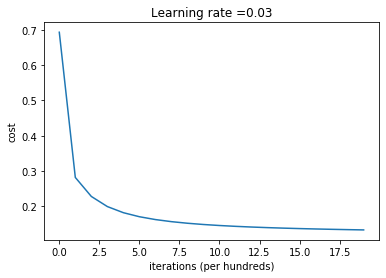

In [23]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()